# Exemplo 6 - Aula 2 

Exemplo utilizando dados sobre cédulas para classificar se são verdadeiras ou falsas e avaliar sua acurácia, utilizando Random Forest

Source: https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

Dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Solução: https://colab.research.google.com/drive/1-2yWaYnKwChIT9VUxd8z9Rmth0ogudnj

In [1]:
# Importando bibliotecas necessárias para trabalhar com os dados, utilizar o modelo de ML, dividir entre teste e treino e avaliar acurácia
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, confusion_matrix

In [2]:
# Importando biblioteca e montando google drive, para ter acesso ao arquivo de dados
from google.colab import drive
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/Data Science/Python/2021-22 PUCRS Pós/Disciplina 3 Python para CD/Prof Mauricio SOFTPLAN/Arquivos/'
# Lendo o arquivo CSV já definindo os nomes das features e da label
banknote_auth_df = pd.read_csv(gdrive_path+'data_banknote_authentication.txt', names=["Variance", "Skewness", "Curtosis", "Entropy", "Class"])

Mounted at /content/gdrive


In [3]:
banknote_auth_df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# Criando variável featues
features = banknote_auth_df[['Variance','Skewness', 'Curtosis', 'Entropy']].values
features[:10]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ],
       [ 4.3684 ,  9.6718 , -3.9606 , -3.1625 ],
       [ 3.5912 ,  3.0129 ,  0.72888,  0.56421],
       [ 2.0922 , -6.81   ,  8.4636 , -0.60216],
       [ 3.2032 ,  5.7588 , -0.75345, -0.61251],
       [ 1.5356 ,  9.1772 , -2.2718 , -0.73535]])

In [5]:
# Criando variável labels
labels = banknote_auth_df['Class'].values
labels

array([0, 0, 0, ..., 1, 1, 1])

In [6]:
# Dividindo features e labels entre dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=0)

In [7]:
# Criando o modelo de classificação Random Forest com repetibilidade e treinando-o
clf = RandomForestClassifier(random_state=0, oob_score=True) #oob = out of bag, calcula o desempenho da random forest nas samples oob
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
clf.oob_score_ # o resultado do calculo de acuracia com oob

0.99179580674567

In [9]:
# Predição com os dados de teste
y_pred = clf.predict(X_test)

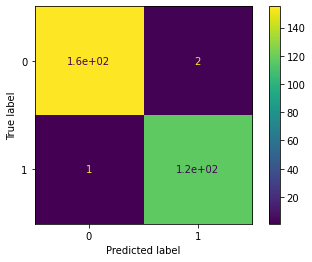

In [10]:
# Matriz de confusão para avaliar o desempenho do modelo nos dados teste
plot_confusion_matrix(clf, X_test, y_test)  

In [11]:
# Código que o prof utilizou para avaliar o desempenho do modelo, calculando precisão, recall e f1-score
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

print(tp, fp, tn, fn)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

117 2 155 1
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       157
           1       0.98      0.99      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9890909090909091
